# Evaluating model performance

In order to evaluate the performance of the model, we have to firstly run inference of the test set.

For this we created a notebook called generate_model_response.ipynb

After running the script, a new file named testing_model_predictions.json is created

In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, multilabel_confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

import matplotlib.pyplot as plt

In [8]:
# Read training data or testing data
df = pd.read_json('testing_model_predictions.json')

# Visualise the top five examples
df.head(n=5)

,intent,max_prediction,find-train,irrelevant,find-flight,find-restaurant,purchase,find-around-me,provide-showtimes,find-hotel
0,irrelevant,purchase,0.019063,0.388085,0.027179,0.053374,0.398776,0.074593,0.010972,0.027957
1,irrelevant,irrelevant,0.033228,0.542000,0.027649,0.029301,0.089124,0.062782,0.034890,0.181026
2,irrelevant,irrelevant,0.017024,0.704971,0.020258,0.102957,0.057472,0.034300,0.025665,0.037352
3,purchase,irrelevant,0.019862,0.422897,0.023757,0.027854,0.286700,0.131648,0.016949,0.070332
4,find-restaurant,find-restaurant,0.029981,0.184255,0.009827,0.581406,0.127771,0.031913,0.021814,0.013032


In [19]:
class_mapping = ['find-train', 'irrelevant', 'find-flight', 'find-restaurant', 'purchase', 'find-around-me', 'provide-showtimes', 'find-hotel']

def map(class_name):
    return class_mapping.index(class_name)

y_true = df.intent.apply(map).to_numpy()
y_pred = df.max_prediction.apply(map).to_numpy()

print(y_true)
print(y_pred)

[1 1 1 ... 1 5 1]
[4 1 1 ... 1 5 1]


In [83]:
average_mode = ['weighted', 'micro', 'macro']

for average in average_mode:
    print('Average mode:', average)
    print(f'Precision: {precision_score(y_true, y_pred, average=average):0.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred, average=average):0.2f}')
    print(f'F-1 Score: {f1_score(y_true, y_pred, average=average):0.2f}')
    print()
    

Average mode: weighted
Precision: 0.82
Recall   : 0.80
F-1 Score: 0.78

Average mode: micro
Precision: 0.80
Recall   : 0.80
F-1 Score: 0.80

Average mode: macro
Precision: 0.85
Recall   : 0.52
F-1 Score: 0.62



In [80]:
print(f'Cohen kappa score: {cohen_kappa_score(y_true, y_pred):0.2f}')

Cohen kappa score: 0.60


<AxesSubplot:>

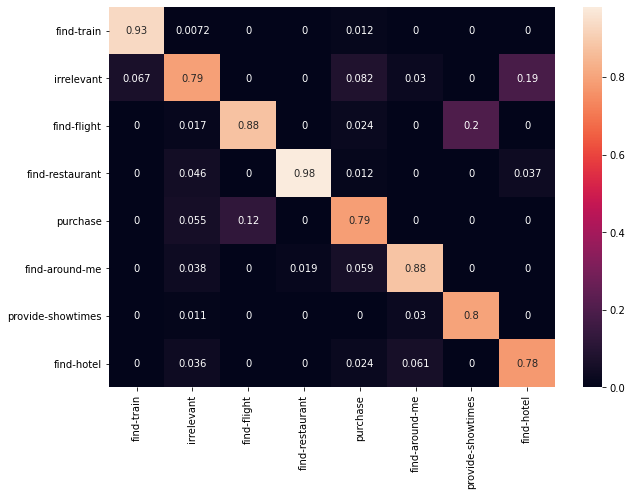

In [76]:
cnf = confusion_matrix(y_true, y_pred, normalize='pred')

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cnf, index = class_mapping, columns = class_mapping)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)